In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/mcdonalds.csv')

In [ ]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [ ]:
MD_x = np.random.randint(0, 2, (100, 5))

In [ ]:
MD_x = df.loc[:,'Like']
print(MD_x)

0                 -3
1                 +2
2                 +1
3                 +4
4                 +2
            ...     
1448    I hate it!-5
1449              +2
1450              +3
1451              +4
1452              -3
Name: Like, Length: 1453, dtype: object


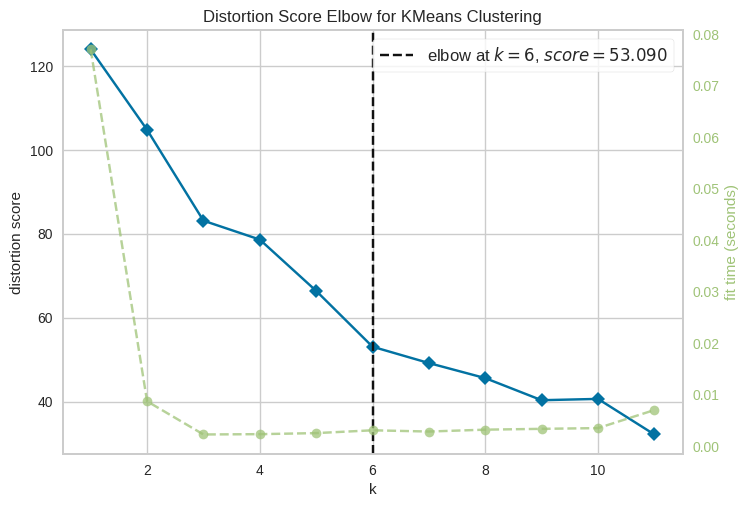

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:

#Using k-means clustering analysis
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(MD_x)
visualizer.show()

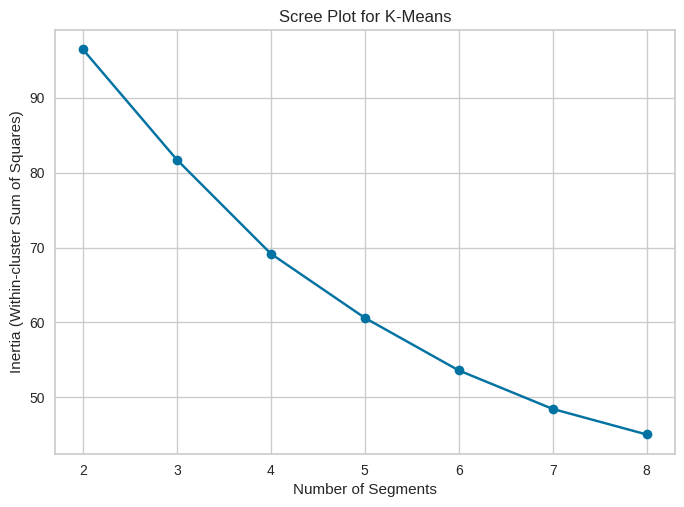

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming MD.x is a pandas DataFrame with your data
X = MD_x  # Replace with actual data

# Range of segments (clusters) to evaluate
n_clusters_range = range(2, 9)
inertia_values = []
silhouette_values = []

for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=1234, n_init=10)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)
    silhouette_values.append(silhouette_score(X, kmeans.labels_))

# Plot the scree plot (inertia values)
plt.plot(n_clusters_range, inertia_values, marker='o')
plt.xlabel('Number of Segments')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Scree Plot for K-Means')
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.mixture import GaussianMixture

# Assuming you have a DataFrame 'df' with the relevant columns

# Create a LabelEncoder
le = LabelEncoder()

# Example of converting categorical columns to numeric using LabelEncoder
# Loop through columns to convert any categorical columns
for column in df.columns:
    if df[column].dtype == 'object':  # Check if column has string data
        df[column] = le.fit_transform(df[column])

# Preparing the data
X = df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']]
y = df['Like']

# Fit a mixture of regression models using GMM for each component
n_components = 2  # You can modify this
gmm = GaussianMixture(n_components=n_components, random_state=1234)
gmm.fit(X)

labels = gmm.predict(X)

# Add the cluster labels to your original DataFrame
df['Cluster'] = labels

# Display the first few rows with cluster assignments
print(df.head())

# Predict the segment assignments
segment_labels = gmm.predict(X)

# Fit a regression model for each segment
results = []
for label in np.unique(segment_labels):
    X_segment = X[segment_labels == label]
    y_segment = y[segment_labels == label]
    X_segment = sm.add_constant(X_segment)  # Adding constant for intercept
    model = sm.OLS(y_segment, X_segment).fit()
    results.append(model)

# Print regression results for each segment
for idx, result in enumerate(results):
    print(f"Segment {idx + 1} - Regression Summary:")
    print(result.summary())


   yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  \
0      0           1      0          1       0     1      1      0          1   
1      1           1      0          1       1     1      1      1          1   
2      0           1      1          1       1     1      0      1          1   
3      1           1      0          1       1     1      1      1          0   
4      0           1      0          1       1     1      1      0          0   

   healthy  disgusting  Like  Age  VisitFrequency  Gender  Cluster  
0        0           0     6   61               0       0        0  
1        0           0     1   51               0       0        1  
2        1           0     0   62               0       0        1  
3        0           1     3   69               4       0        1  
4        1           0     1   49               3       1        0  
Segment 1 - Regression Summary:
                            OLS Regression Results                 